In [65]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans

In [ ]:
def compute_laplacian(W: np.ndarray) -> np.ndarray:
    """Compute the unnormalized graph Laplacian.

    Args:
        W (np.ndarray): Similarity matrix.

    Returns:
        np.ndarray: Unnormalized graph Laplacian.

    """
    D = np.diag(np.sum(W, axis=1))
    return D - W


def compute_symmetric_laplacian(W: np.ndarray) -> np.ndarray:
    """Compute the symmetric normalized graph Laplacian.

    Args:
        W (np.ndarray): Similarity matrix.

    Returns:
        np.ndarray: Symmetric normalized graph Laplacian.

    """
    D_inv_sqrt = np.diag(1.0 / np.sqrt(np.sum(W, axis=1)))
    return np.eye(W.shape[0]) - D_inv_sqrt @ W @ D_inv_sqrt


def compute_random_walk_laplacian(W: np.ndarray) -> np.ndarray:
    """Compute the random walk normalized graph Laplacian.

    Args:
        W (np.ndarray): Similarity matrix.

    Returns:
        np.ndarray: Random walk normalized graph Laplacian.

    """
    D_inv = np.diag(1.0 / np.sum(W, axis=1))
    return np.eye(W.shape[0]) - D_inv @ W


def sort_eigenvalues(M: np.ndarray, k: int) -> tuple:
    """Sort eigenvalues and eigenvectors in ascending order.

    Args:
        M (np.ndarray): Matrix to decompose.
        k (int): Number of smallest eigenvalues and eigenvectors to return.

    Returns:
        tuple: Sorted eigenvalues and corresponding eigenvectors.

    """
    eigenvalues, eigenvectors = np.linalg.eigh(M)
    idx_L = np.argsort(eigenvalues)[:k]
    return eigenvalues[idx_L], eigenvectors[:, idx_L]


def compute_W_matrix(sigma: float, X: np.ndarray) -> np.ndarray:
    """Fill the similarity matrix W.

    Args:
        sigma (float): Parameter for the Gaussian kernel.
        X (np.ndarray): Input data.

    Returns:
        np.ndarray: Similarity matrix W.

    """
    W = np.zeros((len(X), len(X)))
    for i in range(len(X)):
        for j in range(len(X)):
            W[i, j] = (
                0 if i == j else np.exp(-(np.abs(X[i] - X[j]) ** 2) / (2 * sigma**2))
            )
    return W

In [ ]:
def create_X(sigma: float, n: int, m: int) -> np.ndarray:
    """Create a dataset with 4 Gaussian clusters.

    Args:
        sigma (float): Standard deviation of the clusters.
        n (int): Total number of data points.
        m (int): Number of clusters.

    Returns:
        np.ndarray: Generated dataset.

    """
    part = int(n / m)
    norm_1 = np.random.normal(2, sigma, part)
    norm_2 = np.random.normal(4, sigma, part)
    norm_3 = np.random.normal(6, sigma, part)
    norm_4 = np.random.normal(8, sigma, part)

    return np.concatenate([norm_1, norm_2, norm_3, norm_4])


def plot_eigenvalues(sigma: float, n: int, m: int, k: int) -> None:
    """Plot the eigenvalues of the Laplacian for different sigma values.

    Args:
        sigma (float): Standard deviation of the clusters.
        n (int): Total number of data points.
        m (int): Number of clusters.
        k (int): Number of eigenvalues to compute.

    """
    print(f"Plotting the eigenvalues and the distribution for Sigma: {sigma}")
    X = create_X(sigma, n, m)
    W = compute_W_matrix(sigma, X)
    L = compute_laplacian(W)
    eigenvalues_L, _ = sort_eigenvalues(L, k)

    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(X, bins=100, label="Combined Distribution")
    plt.legend()

    ks = range(1, k + 1)
    plt.subplot(1, 2, 2)
    plt.scatter(ks, eigenvalues_L, marker="+")
    plt.title("Eigenvalues of L")
    plt.xlabel("Index")
    plt.ylabel("Eigenvalue")

    plt.show()

Plotting the eigenvalues and the distribution for Sigma: 0.1


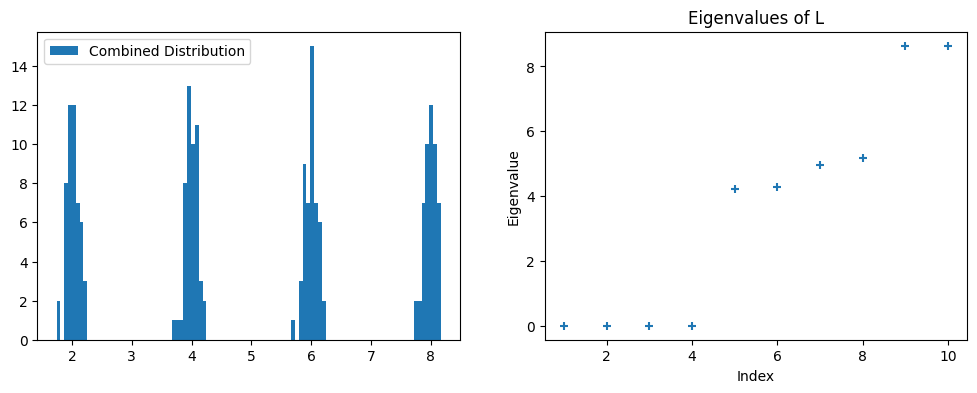

Plotting the eigenvalues and the distribution for Sigma: 0.25


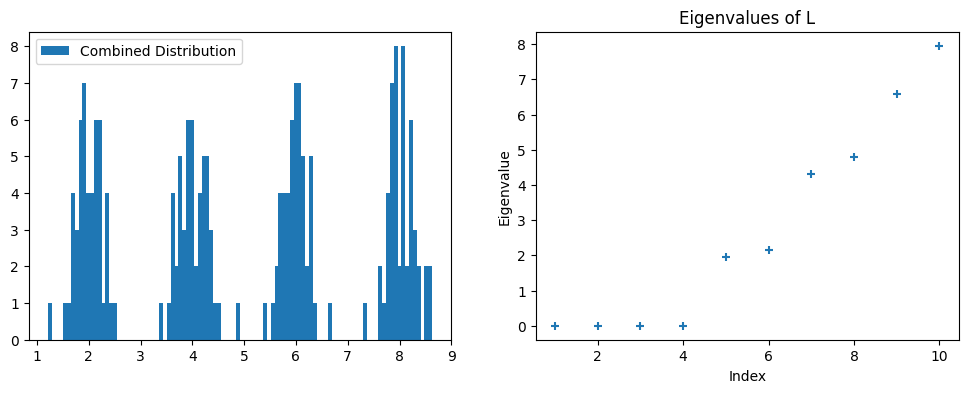

Plotting the eigenvalues and the distribution for Sigma: 0.5


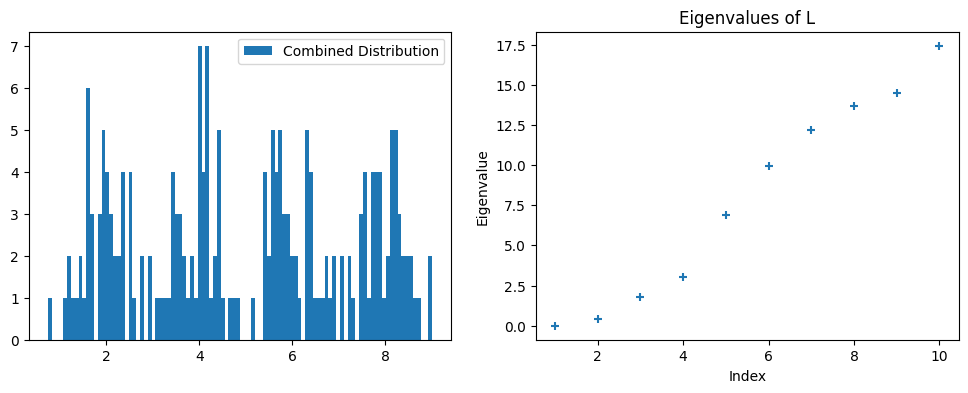

Plotting the eigenvalues and the distribution for Sigma: 1


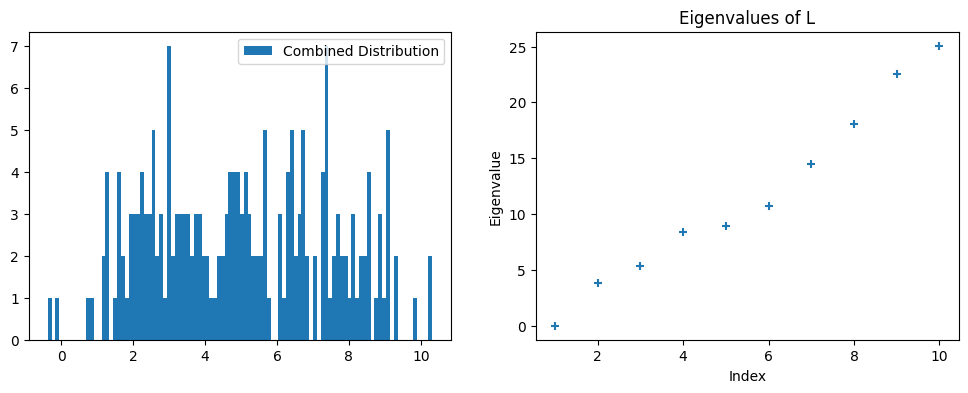

In [68]:
k = 10
n = 200
m = 4
for sigma in [0.1, 1 / 4, 0.5, 1]:
    plot_eigenvalues(sigma, n=n, m=m, k=k)

In [ ]:
def spectral_clustering(sigma: float, n: int, m: int, k: int) -> np.ndarray:
    """Perform spectral clustering on the data.

    Args:
        sigma (float): The sigma value for the similarity matrix.
        n (int): Number of data points.
        m (int): Number of clusters.
        k (int): Number of eigenvectors to use.

    Returns:
        X: The data points.
        clusters: The cluster assignments.

    """
    X = create_X(sigma, n, m).reshape(-1, 1)
    W = compute_W_matrix(sigma, X)
    L = compute_laplacian(W)

    _, eigenvectors = sort_eigenvalues(L, k)
    U_normalized = eigenvectors / np.linalg.norm(eigenvectors, axis=1, keepdims=True)

    kmeans = KMeans(n_clusters=k)

    return X, kmeans.fit_predict(U_normalized)

/var/folders/tp/_ld5_pzs6nx6mv1pbjhq1l740000gn/T/ipykernel_20129/2454322060.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  W[i, j] = (


Text(0.5, 0, 'Data Points')

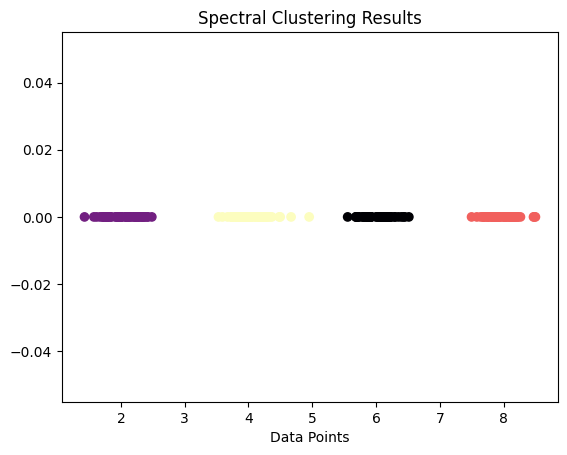

In [70]:
X, clusters = spectral_clustering(1 / 4, n=200, m=4, k=4)

plt.scatter(X, np.zeros_like(X), c=clusters, cmap="magma")
plt.title("Spectral Clustering Results")
plt.xlabel("Data Points")